In [1]:
import sys
sys.path.append("../") # adding the path to read the utils file
import pandas as pd
from utils import *
import networkx as nx
import glob

pd.set_option('display.max_columns', None)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
ds = pd.concat([pd.read_csv(csv_file, engine='pyarrow', index_col='id') for csv_file in glob.glob('../datasets/NFS-2023-TE/*.csv')], ignore_index=True)
ds.head()

,expiration_id,src_ip,src_mac,src_oui,src_port,dst_ip,dst_mac,dst_oui,dst_port,protocol,ip_version,vlan_id,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_duration_ms,bidirectional_packets,bidirectional_bytes,src2dst_first_seen_ms,src2dst_last_seen_ms,src2dst_duration_ms,src2dst_packets,src2dst_bytes,dst2src_first_seen_ms,dst2src_last_seen_ms,dst2src_duration_ms,dst2src_packets,dst2src_bytes,bidirectional_min_ps,bidirectional_mean_ps,bidirectional_stddev_ps,bidirectional_max_ps,src2dst_min_ps,src2dst_mean_ps,src2dst_stddev_ps,src2dst_max_ps,dst2src_min_ps,dst2src_mean_ps,dst2src_stddev_ps,dst2src_max_ps,bidirectional_min_piat_ms,bidirectional_mean_piat_ms,bidirectional_stddev_piat_ms,bidirectional_max_piat_ms,src2dst_min_piat_ms,src2dst_mean_piat_ms,src2dst_stddev_piat_ms,src2dst_max_piat_ms,dst2src_min_piat_ms,dst2src_mean_piat_ms,dst2src_stddev_piat_ms,dst2src_max_piat_ms,bidirectional_syn_packets,bidirectional_cwr_packets,bidirectional_ece_packets,bidirectional_urg_packets,bidirectional_ack_packets,bidirectional_psh_packets,bidirectional_rst_packets,bidirectional_fin_packets,src2dst_syn_packets,src2dst_cwr_packets,src2dst_ece_packets,src2dst_urg_packets,src2dst_ack_packets,src2dst_psh_packets,src2dst_rst_packets,src2dst_fin_packets,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,label
0,-1,192.168.10.9,b8:ac:6f:1d:1f:6c,b8:ac:6f,1031,192.168.10.3,18:66:da:9b:e3:7d,18:66:da,88,6,4,0,1499428835357,1499428835358,1,6,800,1499428835357,1499428835358,1,4,473,1499428835357,1499428835358,1,2,327,60,133.333333,109.302638,287,60,118.25,112.535550,287,66,163.5,137.885822,261,0,0.200000,0.447214,1,0,0.333333,0.57735,1,1,1.0,0.000000,1,2,0,0,0,5,2,0,1,1,0,0,0,3,1,0,1,1,0,0,0,2,1,0,0,BENIGN
1,-1,192.168.10.3,18:66:da:9b:e3:7d,18:66:da,88,192.168.10.9,b8:ac:6f:1d:1f:6c,b8:ac:6f,1031,6,4,0,1499428835358,1499428835358,0,2,120,1499428835358,1499428835358,0,2,120,0,0,0,0,0,60,60.000000,0.000000,60,60,60.00,0.000000,60,0,0.0,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.00000,0,0,0.0,0.000000,0,0,0,0,0,2,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,BENIGN
2,-1,192.168.10.9,b8:ac:6f:1d:1f:6c,b8:ac:6f,1032,192.168.10.3,18:66:da:9b:e3:7d,18:66:da,88,6,4,0,1499428835374,1499428835375,1,7,2265,1499428835374,1499428835375,1,5,613,1499428835374,1499428835375,1,2,1652,60,323.571429,568.141372,1586,60,122.60,136.648454,367,66,826.0,1074.802307,1586,0,0.166667,0.408248,1,0,0.250000,0.50000,1,1,1.0,0.000000,1,2,0,0,0,6,2,0,1,1,0,0,0,4,1,0,1,1,0,0,0,2,1,0,0,BENIGN
3,-1,192.168.10.3,18:66:da:9b:e3:7d,18:66:da,88,192.168.10.9,b8:ac:6f:1d:1f:6c,b8:ac:6f,1032,6,4,0,1499428835375,1499428835375,0,2,120,1499428835375,1499428835375,0,2,120,0,0,0,0,0,60,60.000000,0.000000,60,60,60.00,0.000000,60,0,0.0,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.00000,0,0,0.0,0.000000,0,0,0,0,0,2,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,BENIGN
4,-1,192.168.10.9,b8:ac:6f:1d:1f:6c,b8:ac:6f,1033,192.168.10.3,18:66:da:9b:e3:7d,18:66:da,88,6,4,0,1499428835416,1499428835417,1,8,3550,1499428835416,1499428835417,1,5,1852,1499428835416,1499428835417,1,3,1698,60,443.750000,706.926901,1606,60,370.40,690.726284,1606,60,566.0,871.226721,1572,0,0.142857,0.377964,1,0,0.250000,0.50000,1,0,0.5,0.707107,1,2,0,0,0,7,2,0,1,1,0,0,0,4,1,0,1,1,0,0,0,3,1,0,0,BENIGN


In [5]:
ds.describe()

,expiration_id,src_port,dst_port,protocol,ip_version,vlan_id,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_duration_ms,bidirectional_packets,bidirectional_bytes,src2dst_first_seen_ms,src2dst_last_seen_ms,src2dst_duration_ms,src2dst_packets,src2dst_bytes,dst2src_first_seen_ms,dst2src_last_seen_ms,dst2src_duration_ms,dst2src_packets,dst2src_bytes,bidirectional_min_ps,bidirectional_mean_ps,bidirectional_stddev_ps,bidirectional_max_ps,src2dst_min_ps,src2dst_mean_ps,src2dst_stddev_ps,src2dst_max_ps,dst2src_min_ps,dst2src_mean_ps,dst2src_stddev_ps,dst2src_max_ps,bidirectional_min_piat_ms,bidirectional_mean_piat_ms,bidirectional_stddev_piat_ms,bidirectional_max_piat_ms,src2dst_min_piat_ms,src2dst_mean_piat_ms,src2dst_stddev_piat_ms,src2dst_max_piat_ms,dst2src_min_piat_ms,dst2src_mean_piat_ms,dst2src_stddev_piat_ms,dst2src_max_piat_ms,bidirectional_syn_packets,bidirectional_cwr_packets,bidirectional_ece_packets,bidirectional_urg_packets,bidirectional_ack_packets,bidirectional_psh_packets,bidirectional_rst_packets,bidirectional_fin_packets,src2dst_syn_packets,src2dst_cwr_packets,src2dst_ece_packets,src2dst_urg_packets,src2dst_ack_packets,src2dst_psh_packets,src2dst_rst_packets,src2dst_fin_packets,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets
count,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3153360.0,3153360.0,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3153360.0,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3153360.0,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3153360.0,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06
mean,-5.009771e-01,4.159168e+04,7.374128e+03,9.568456e+00,4.0,0.0,1.499283e+12,1.499283e+12,7.257902e+03,1.683985e+01,1.590955e+04,1.499283e+12,1.499283e+12,7.030847e+03,8.444606e+00,5.132959e+03,1.055202e+12,1.055202e+12,6.414685e+03,8.395248e+00,1.077659e+04,7.041988e+01,2.508698e+02,3.004148e+02,9.158482e+02,8.071828e+01,1.101869e+02,5.055068e+01,2.165028e+02,7.445307e+01,3.269168e+02,3.169548e+02,8.509337e+02,4.681841e+01,4.395113e+02,8.065377e+02,2.364488e+03,2.444607e+02,7.574259e+02,7.969384e+02,2.257886e+03,3.192646e+02,7.252505e+02,5.386835e+02,1.769598e+03,5.954246e-01,2.695537e-04,4.059162e-04,0.0,1.575151e+01,2.007954e+00,1.751256e-01,3.428831e-01,3.424747e-01,2.635284e-04,2.200827e-04,0.0,7.736506e+00,9.631764e-01,7.217286e-02,2.068016e-01,2.529499e-01,6.025319e-06,1.858335e-04,0.0,8.015003e+00,1.044778e+00,1.029527e-01,1.360815e-01
std,5.329751e-01,2.193754e+04,1.742745e+04,5.149674e+00,0.0,0.0,1.237256e+08,1.237248e+08,2.441655e+04,1.654905e+03,2.238048e+06,1.237256e+08,1.237248e+08,2.427870e+04,8.468361e+02,1.538918e+06,6.845397e+11,6.845397e+11,2.370653e+04,8.248542e+02,1.565745e+06,2.760330e+01,3.937213e+02,6.920172e+02,1.946518e+03,1.374479e+02,1.815780e+02,1.669688e+02,4.847147e+02,7.436871e+01,6.199198e+02,8.348410e+02,1.927523e+03,8.930475e+02,1.643712e+03,2.654583e+03,8.108747e+03,2.892782e+03,3.332408e+03,2.709240e+03,8.083917e+03,3.555000e+03,4.027414e+03,2.420409e+03,7.732008e+03,9.187967e-01,2.283147e-02,2.800706e-02,0.0,1.654901e+03,2.290546e+01,3.800745e-01,4.746729e-01,5.450138e-01,2.257312e-02,1.500361e-02,0.0,8.468355e+02,1.431934e+01,2.587739e-01,4.050121e-01,4.438178e-01,2.926134e-03,1.370043e-02,0.0,8.248512e+02,1.649771e+01,3.038972e-01,3.428752e-01
min,-1.0

col:  expiration_id


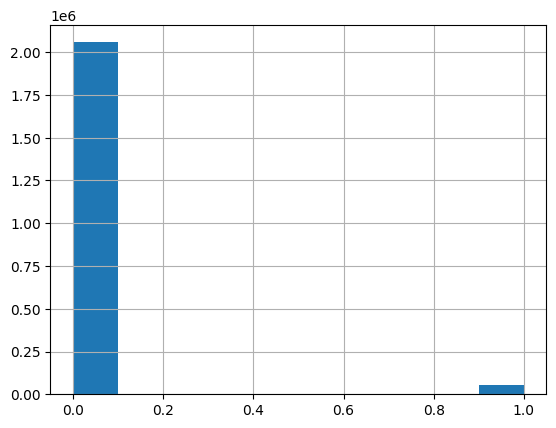

col:  src_port


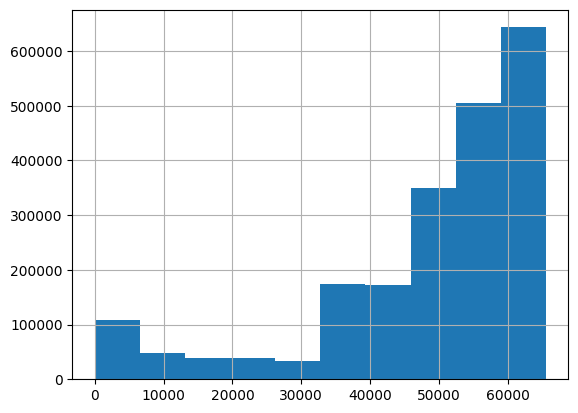

col:  dst_port


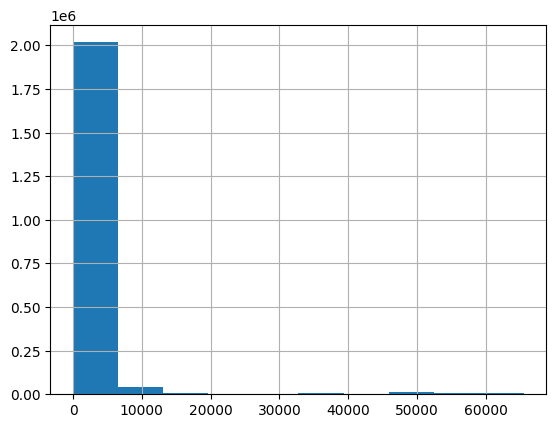

col:  protocol


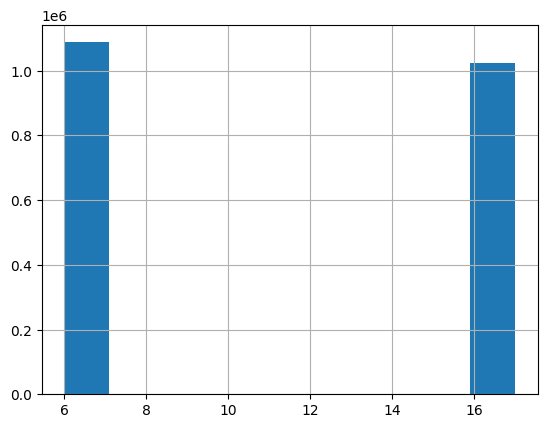

col:  ip_version


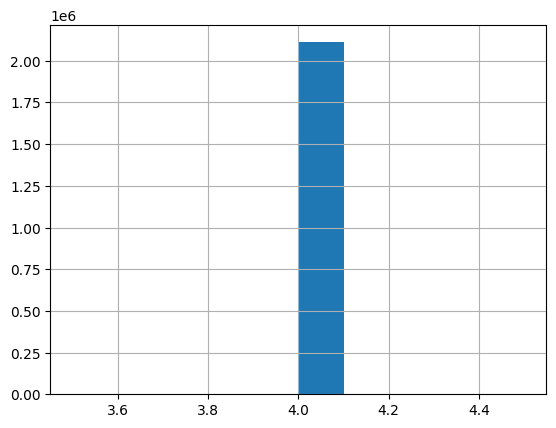

col:  vlan_id


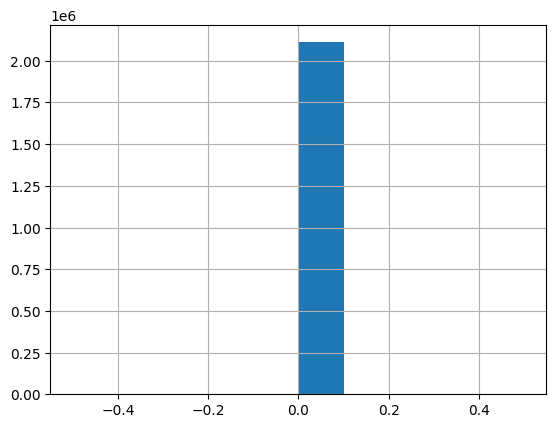

col:  bidirectional_first_seen_ms


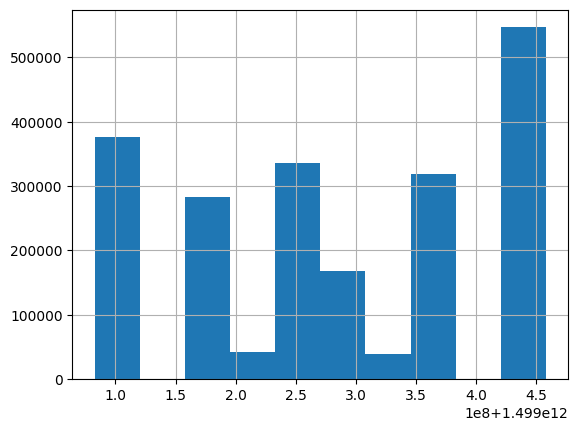

col:  bidirectional_last_seen_ms


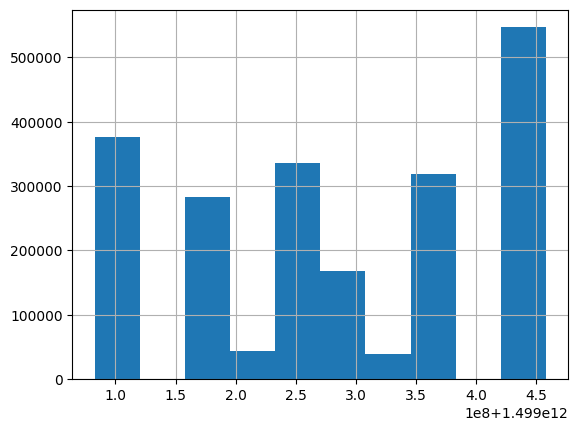

col:  bidirectional_duration_ms


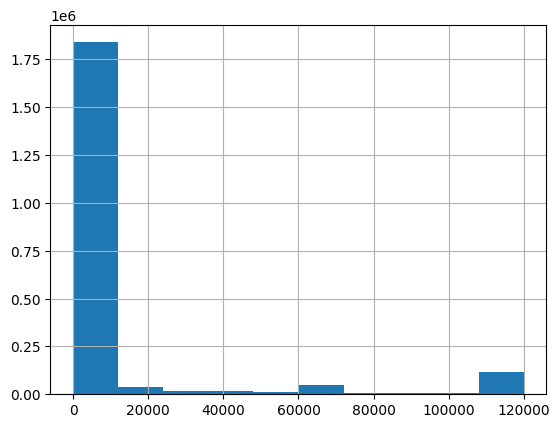

col:  bidirectional_packets


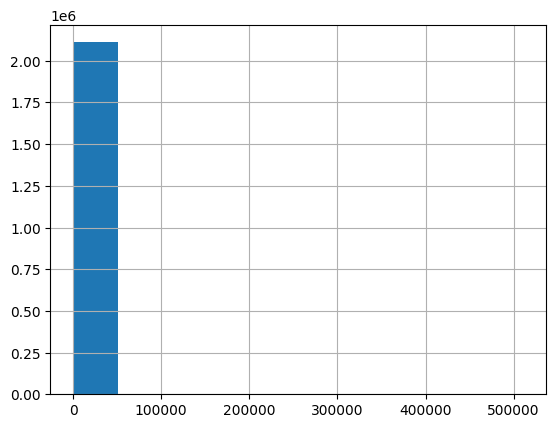

col:  bidirectional_bytes


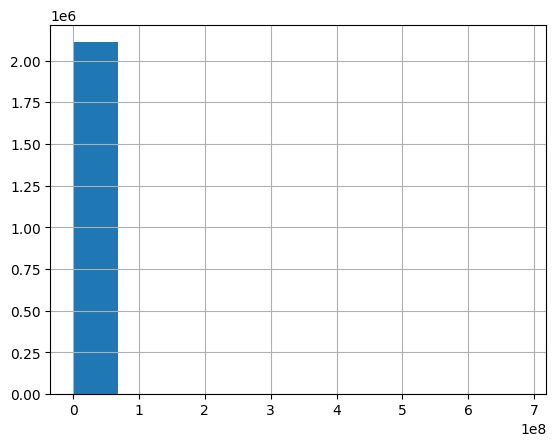

col:  src2dst_first_seen_ms


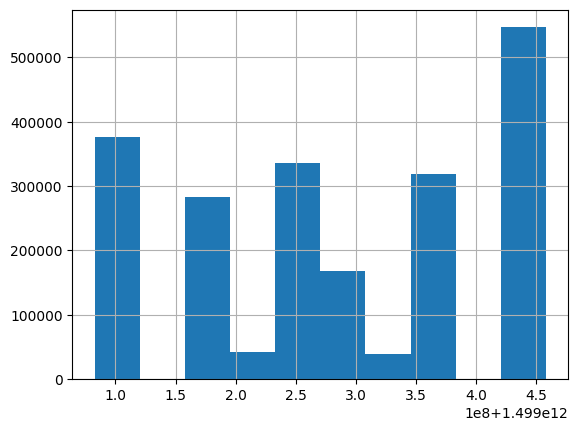

col:  src2dst_last_seen_ms


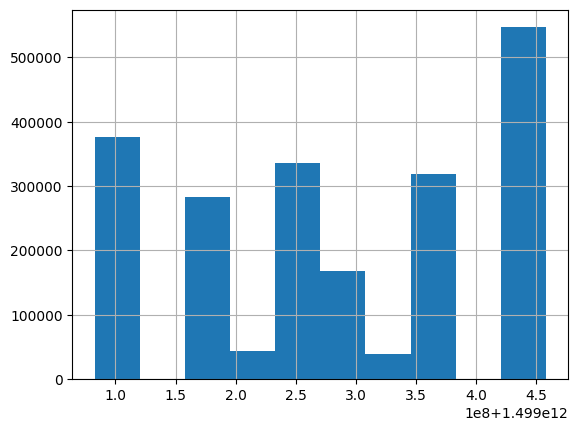

col:  src2dst_duration_ms


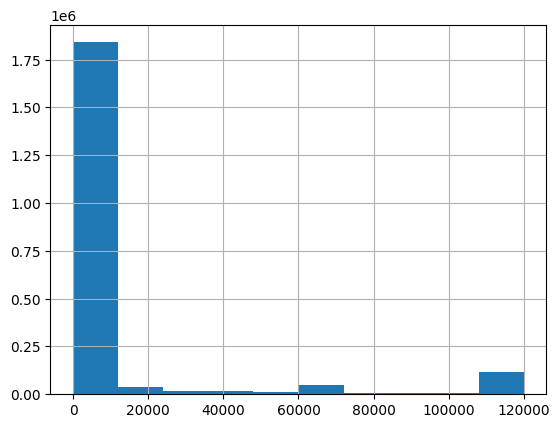

col:  src2dst_packets


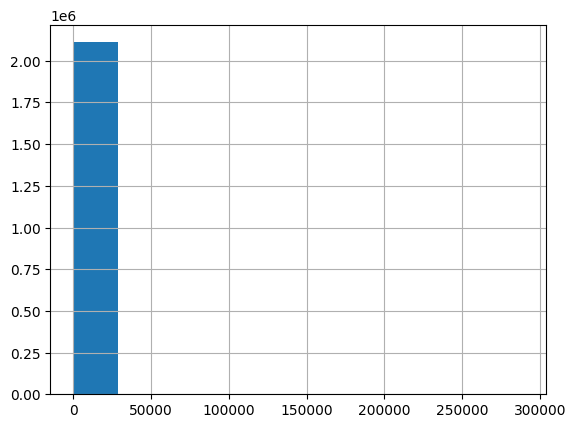

col:  src2dst_bytes


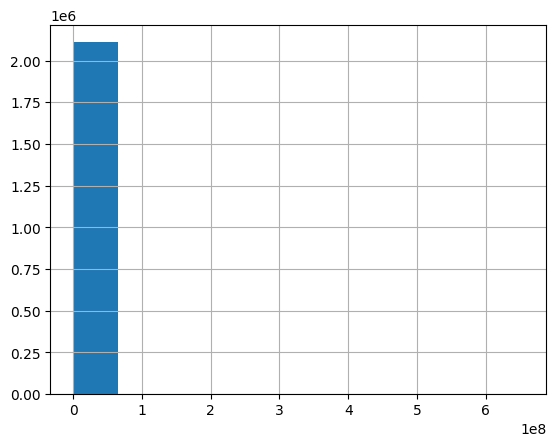

col:  dst2src_first_seen_ms


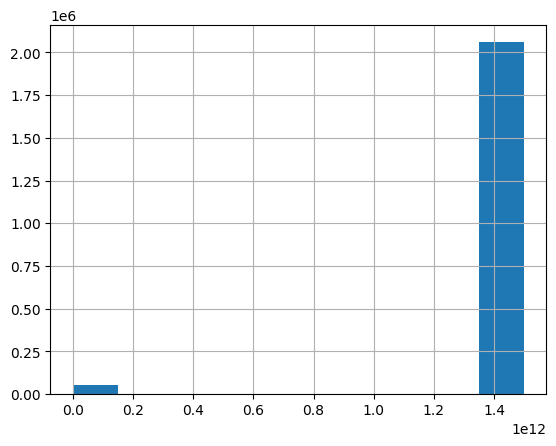

col:  dst2src_last_seen_ms


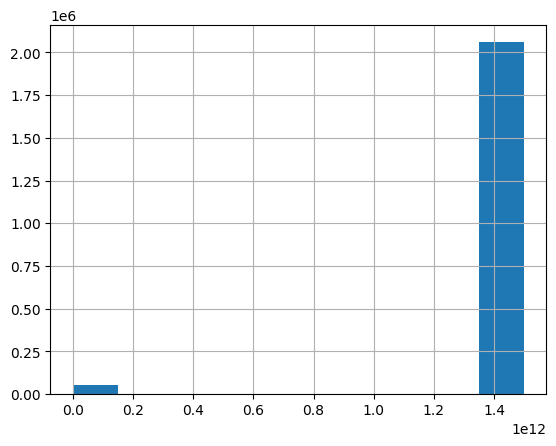

col:  dst2src_duration_ms


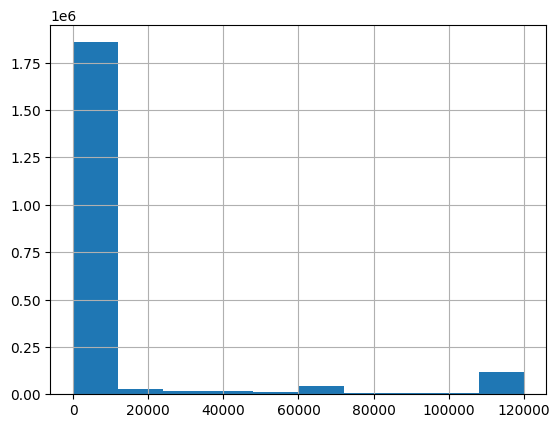

col:  dst2src_packets


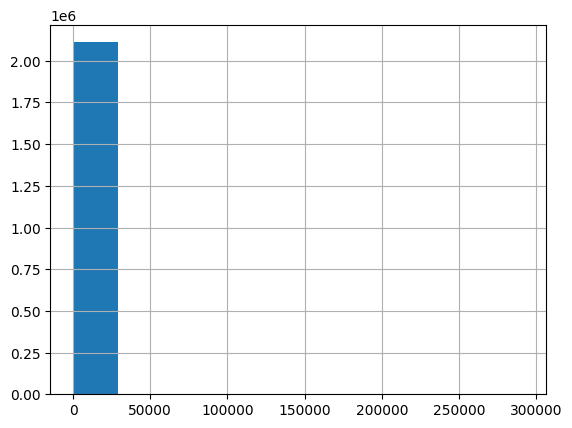

col:  dst2src_bytes


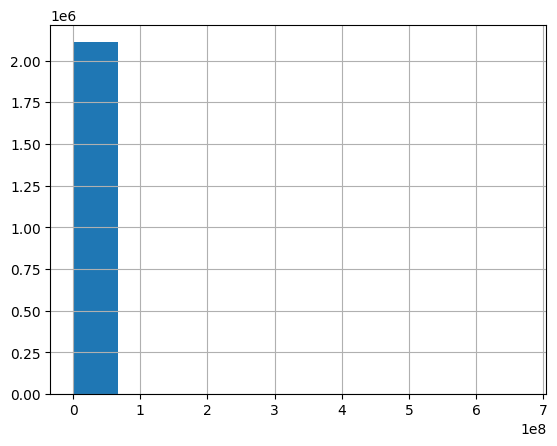

col:  bidirectional_min_ps


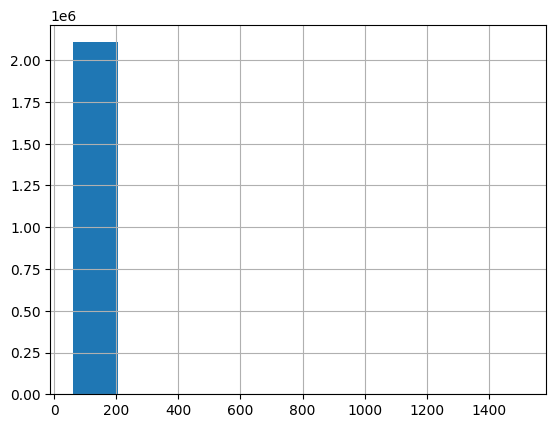

col:  bidirectional_mean_ps


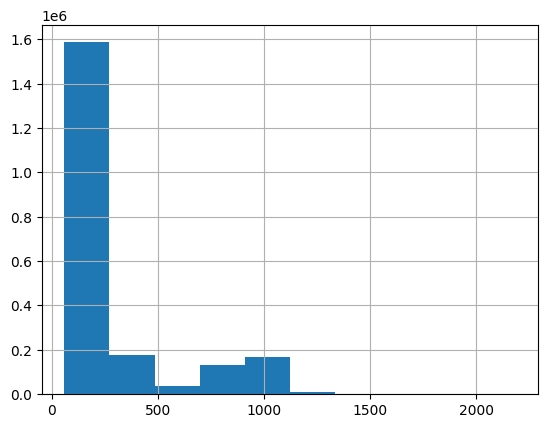

col:  bidirectional_stddev_ps


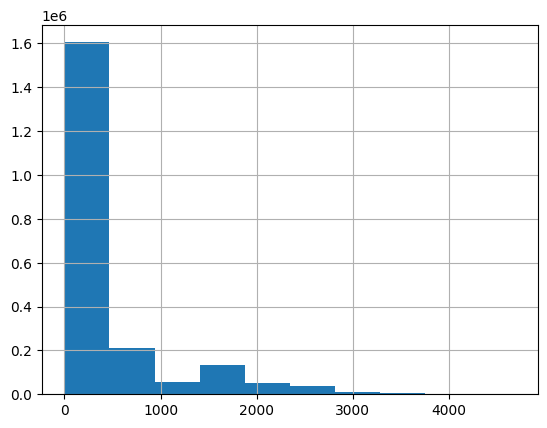

col:  bidirectional_max_ps


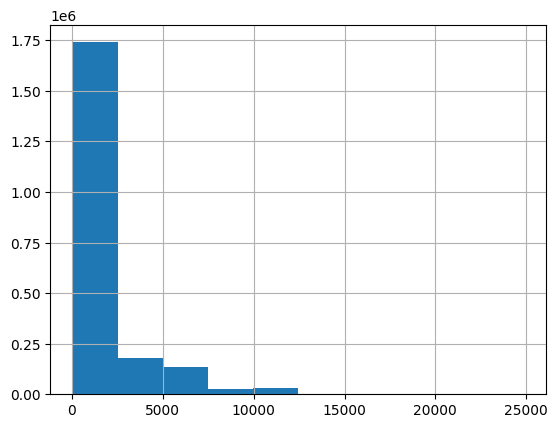

col:  src2dst_min_ps


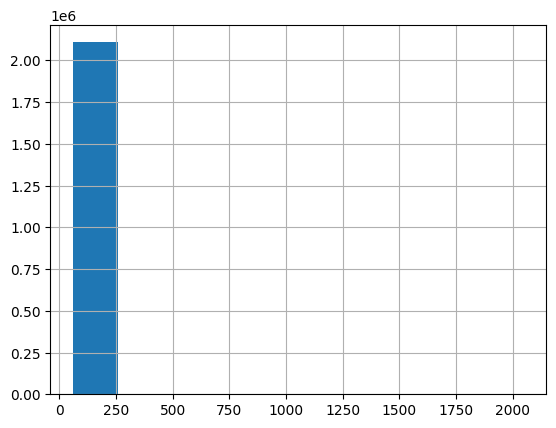

col:  src2dst_mean_ps


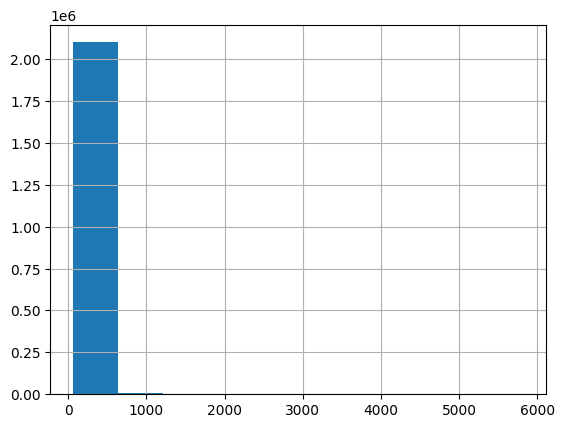

col:  src2dst_stddev_ps


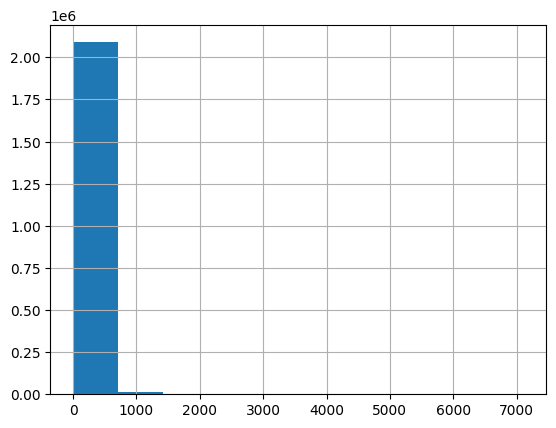

col:  src2dst_max_ps


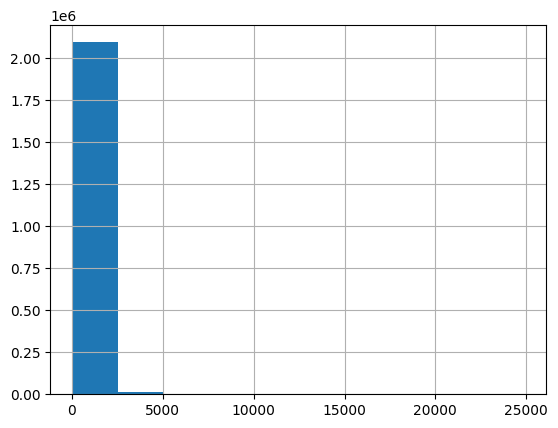

col:  dst2src_min_ps


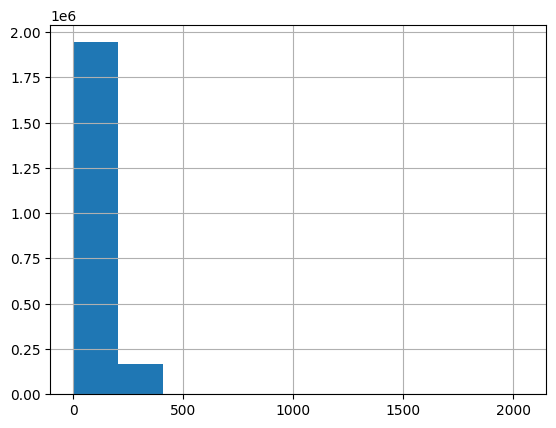

col:  dst2src_mean_ps


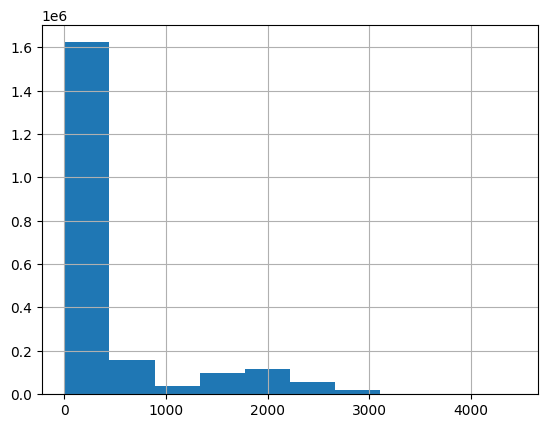

col:  dst2src_stddev_ps


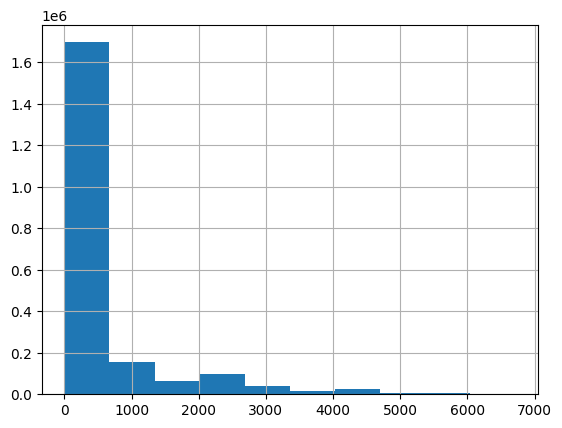

col:  dst2src_max_ps


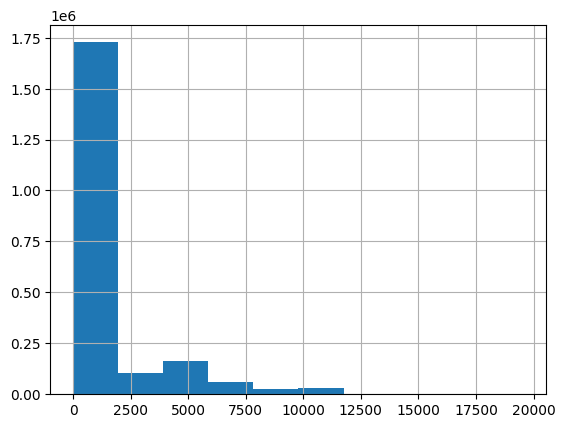

col:  bidirectional_min_piat_ms


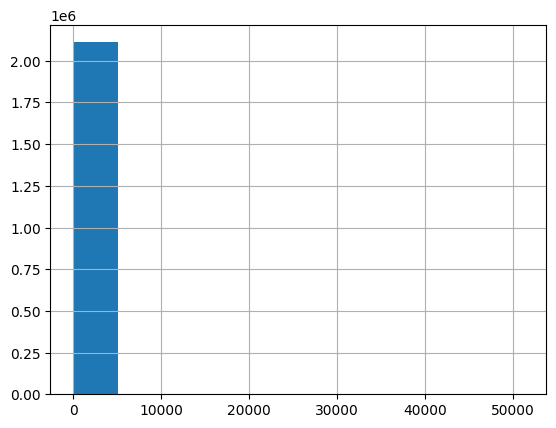

col:  bidirectional_mean_piat_ms


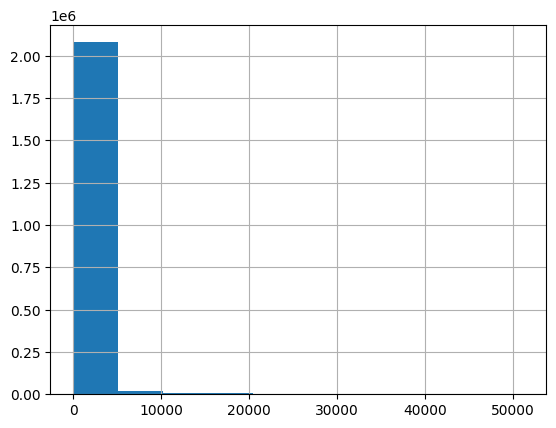

col:  bidirectional_stddev_piat_ms


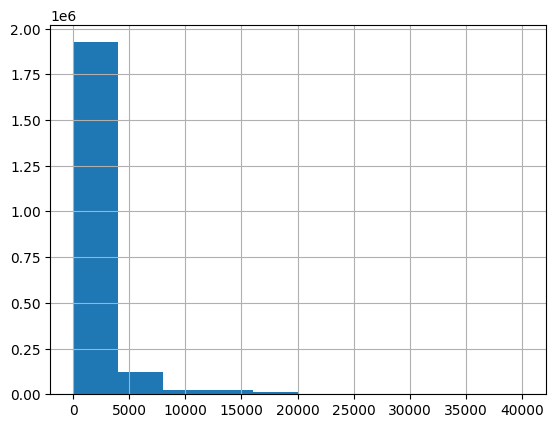

col:  bidirectional_max_piat_ms


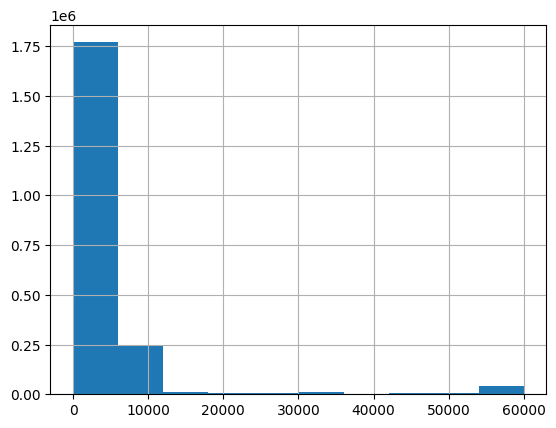

col:  src2dst_min_piat_ms


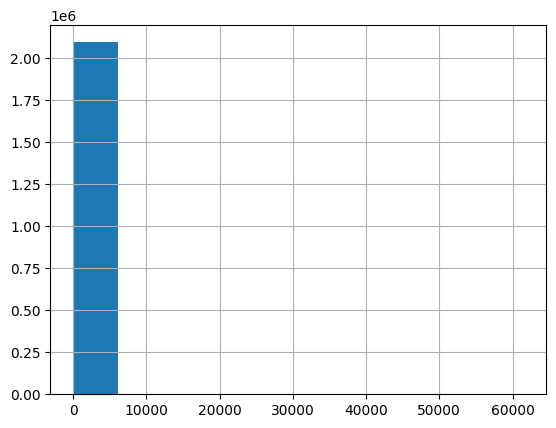

col:  src2dst_mean_piat_ms


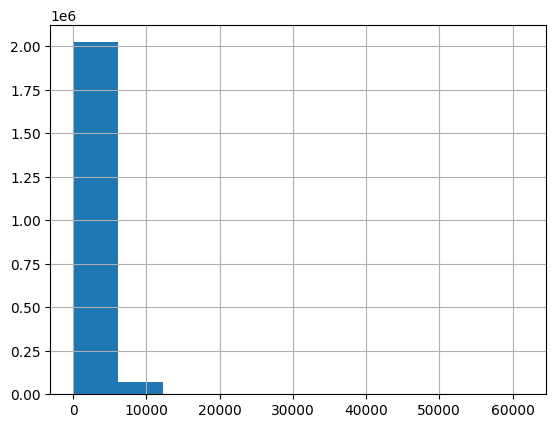

col:  src2dst_stddev_piat_ms


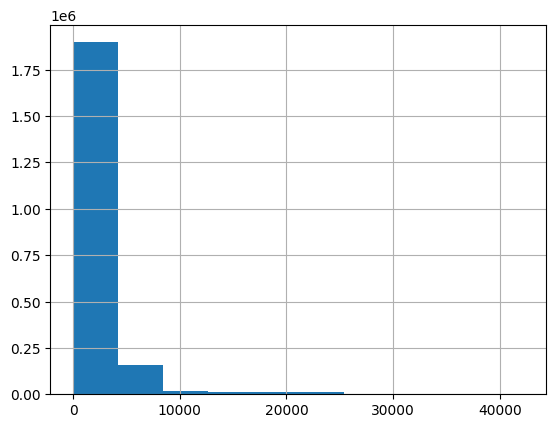

col:  src2dst_max_piat_ms


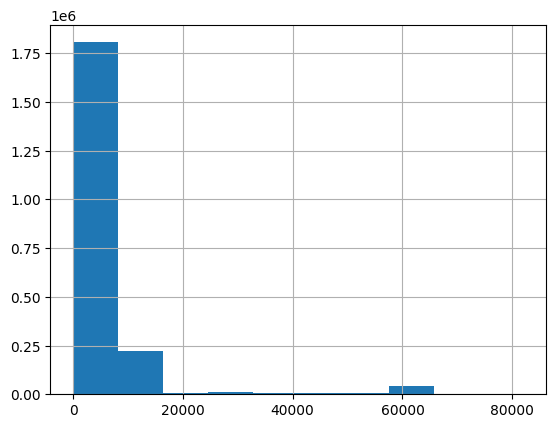

col:  dst2src_min_piat_ms


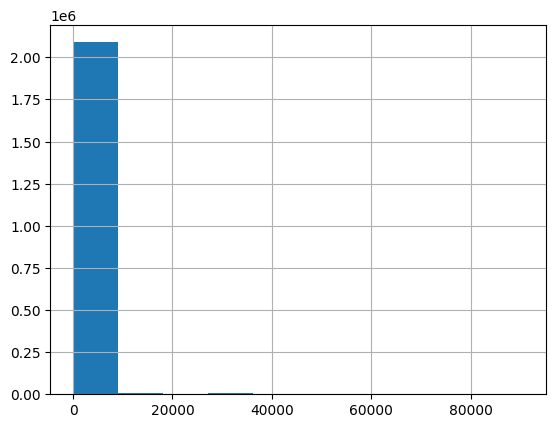

col:  dst2src_mean_piat_ms


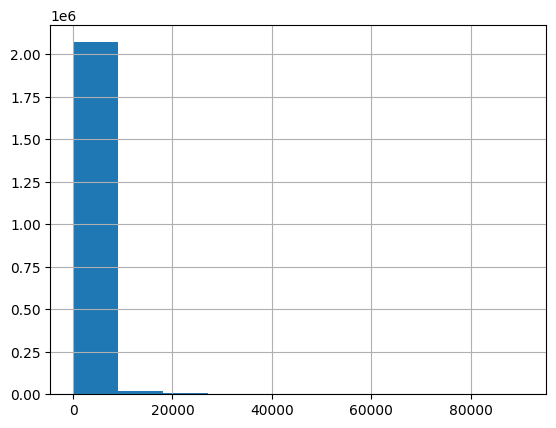

col:  dst2src_stddev_piat_ms


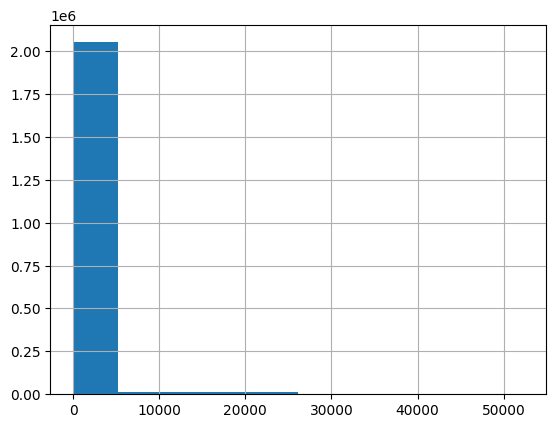

col:  dst2src_max_piat_ms


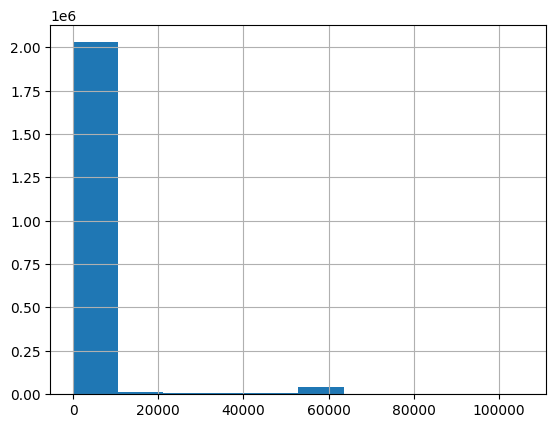

col:  bidirectional_syn_packets


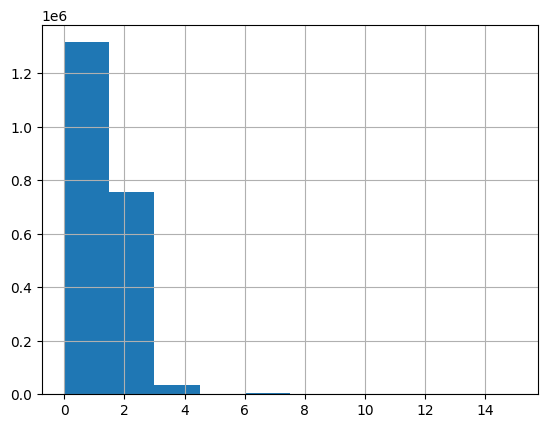

col:  bidirectional_cwr_packets


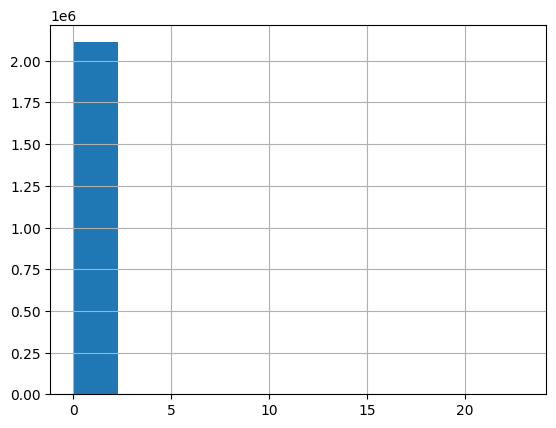

col:  bidirectional_ece_packets


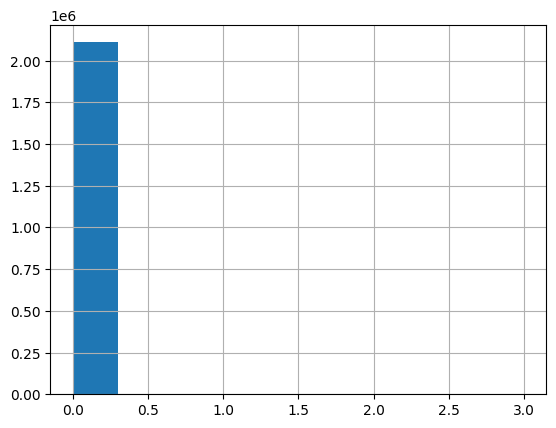

col:  bidirectional_urg_packets


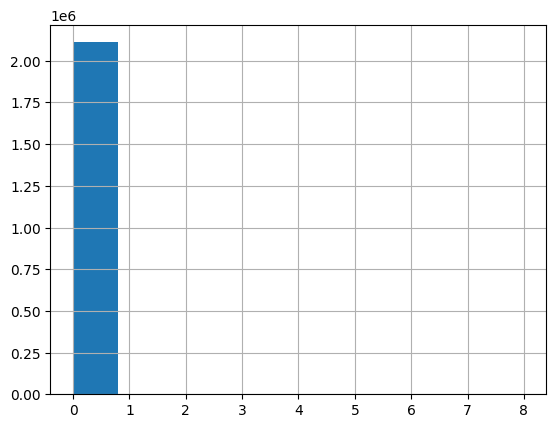

col:  bidirectional_ack_packets


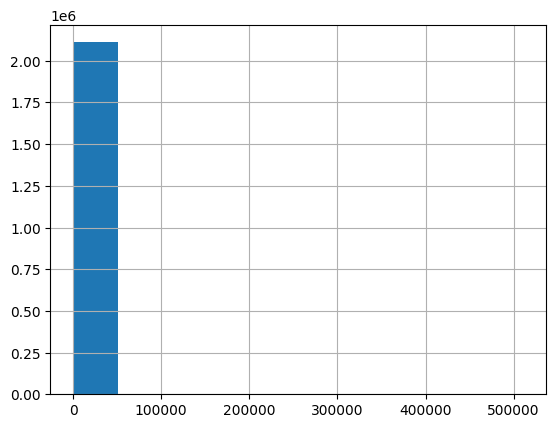

col:  bidirectional_psh_packets


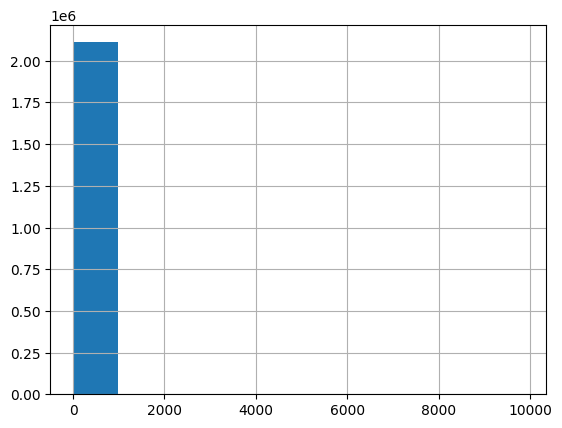

col:  bidirectional_rst_packets


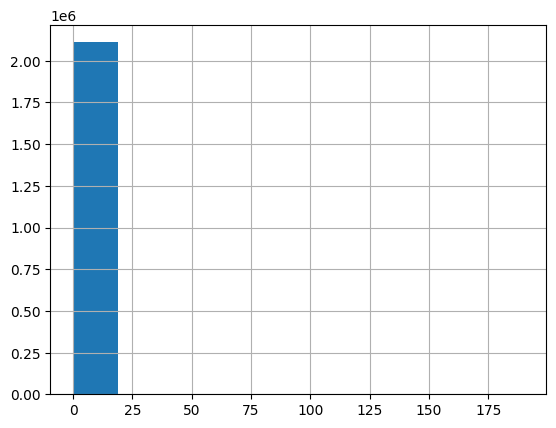

col:  bidirectional_fin_packets


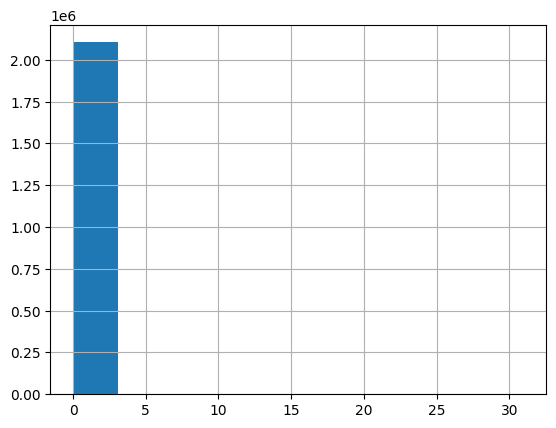

col:  src2dst_syn_packets


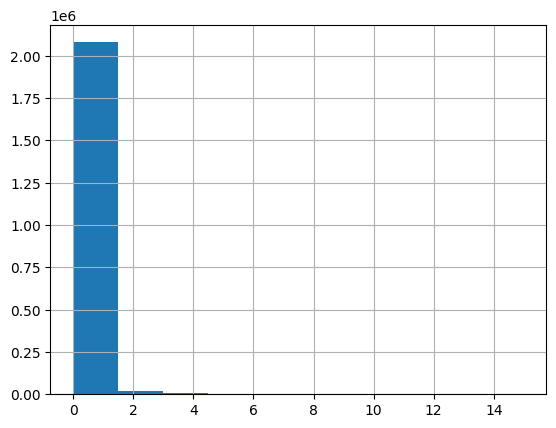

col:  src2dst_cwr_packets


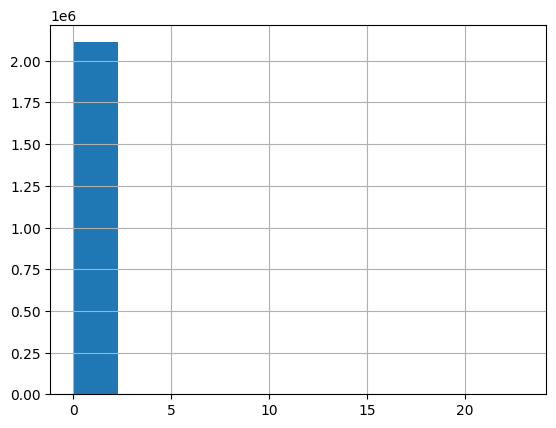

col:  src2dst_ece_packets


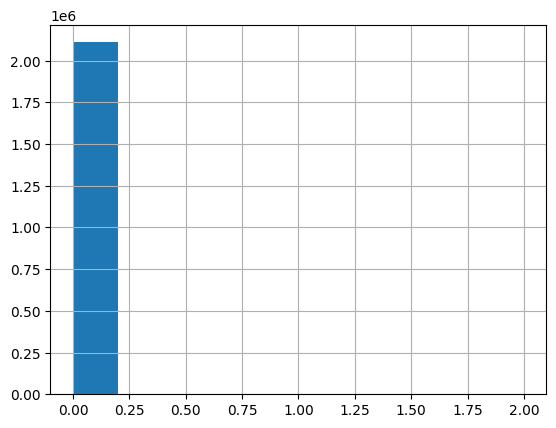

col:  src2dst_urg_packets


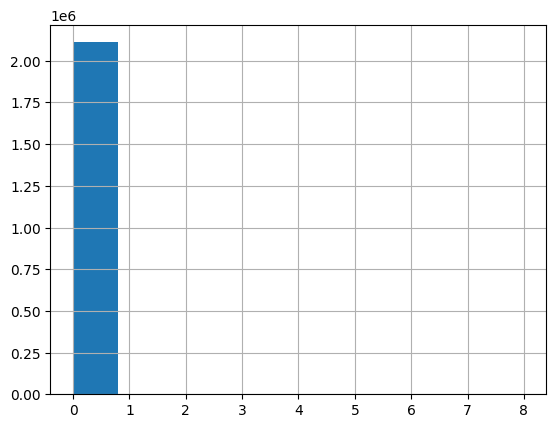

col:  src2dst_ack_packets


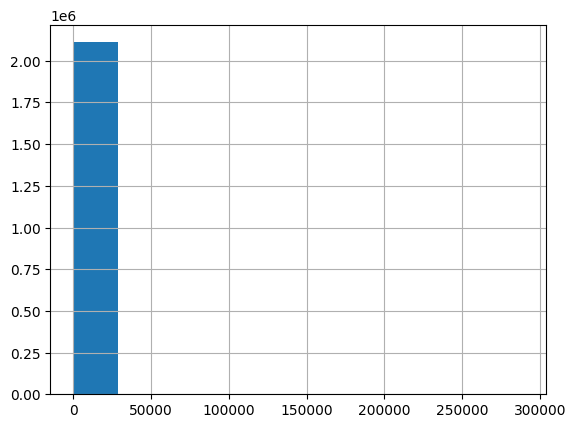

col:  src2dst_psh_packets


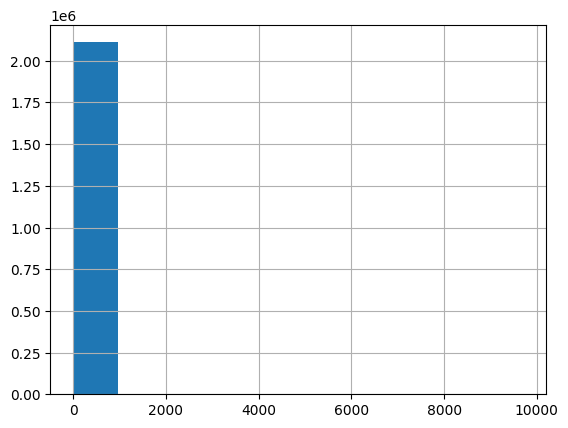

col:  src2dst_rst_packets


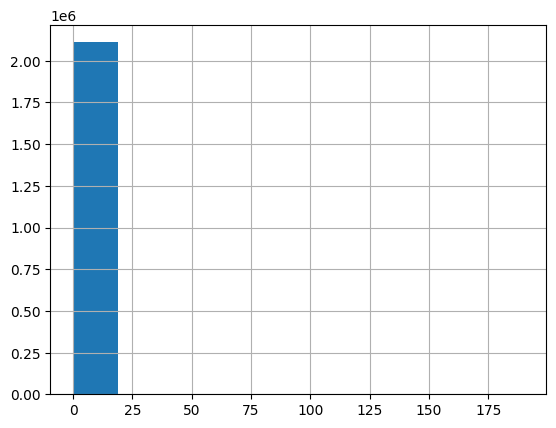

col:  src2dst_fin_packets


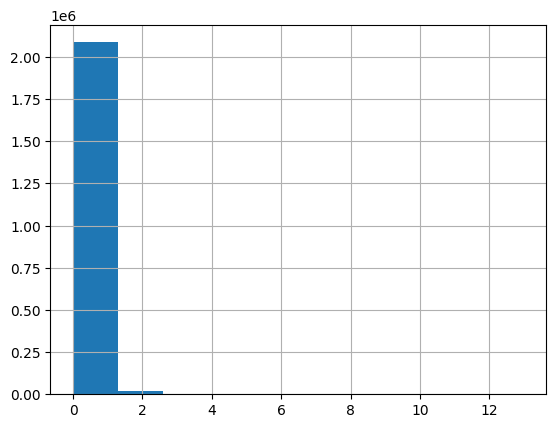

col:  dst2src_syn_packets


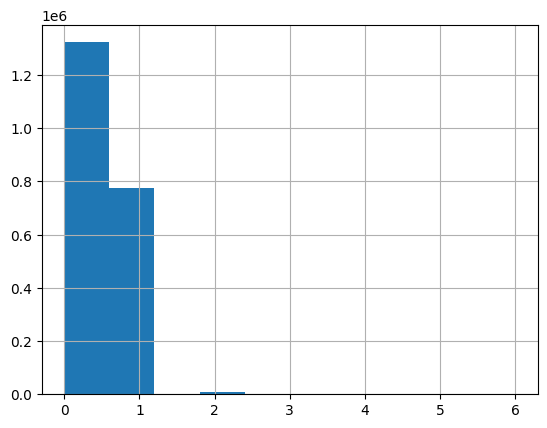

col:  dst2src_cwr_packets


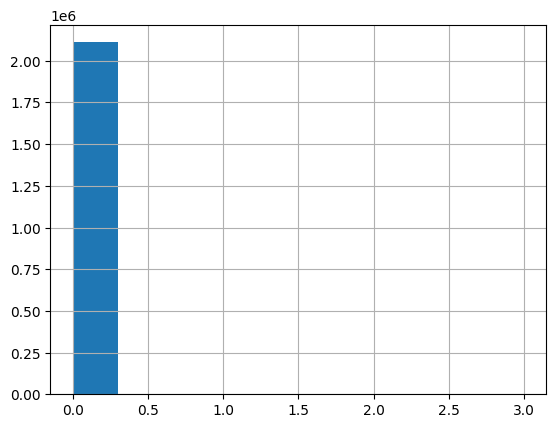

col:  dst2src_ece_packets


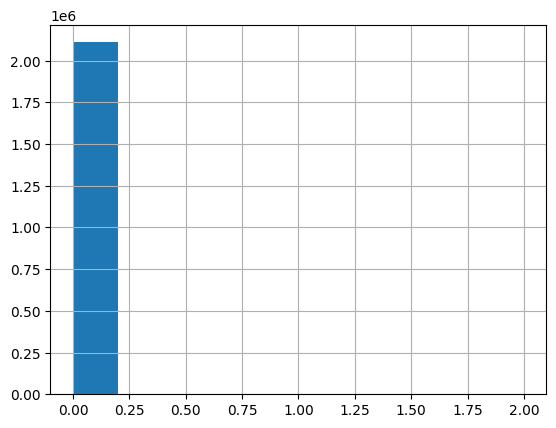

col:  dst2src_urg_packets


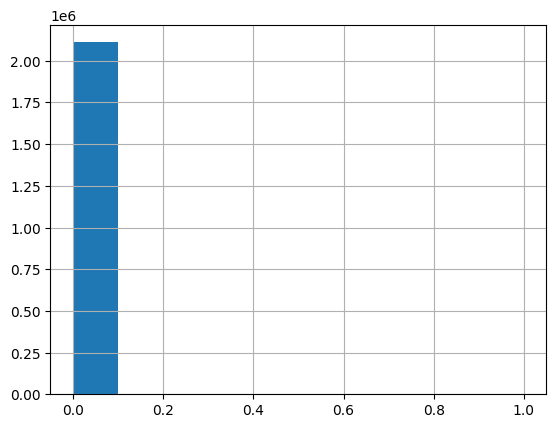

col:  dst2src_ack_packets


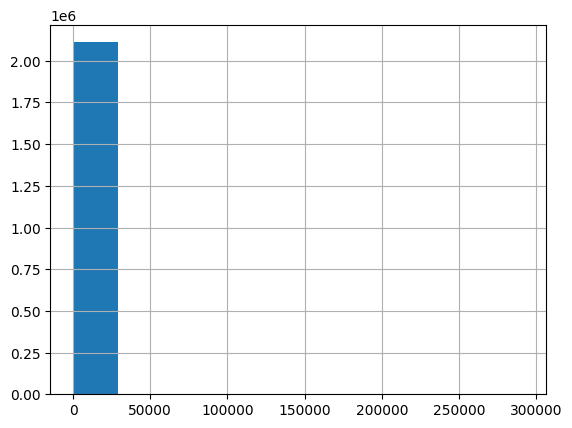

col:  dst2src_psh_packets


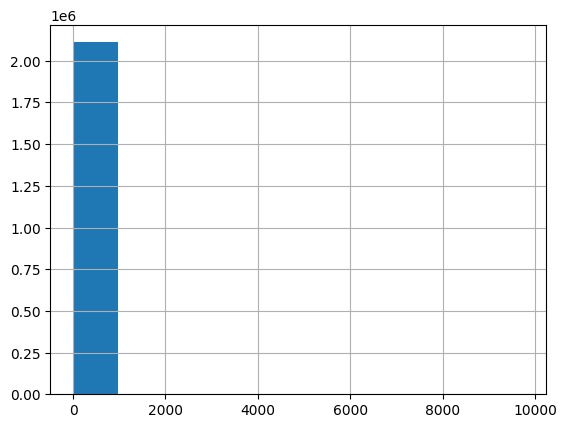

col:  dst2src_rst_packets


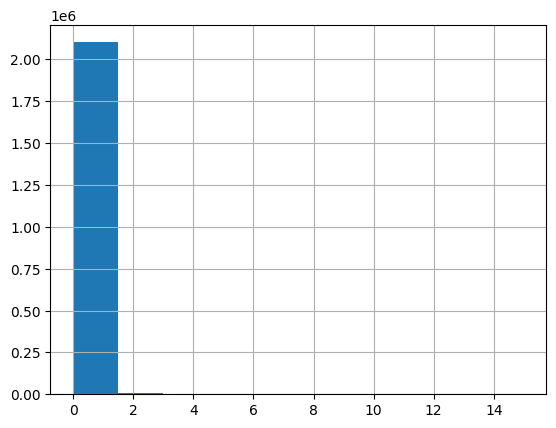

col:  dst2src_fin_packets


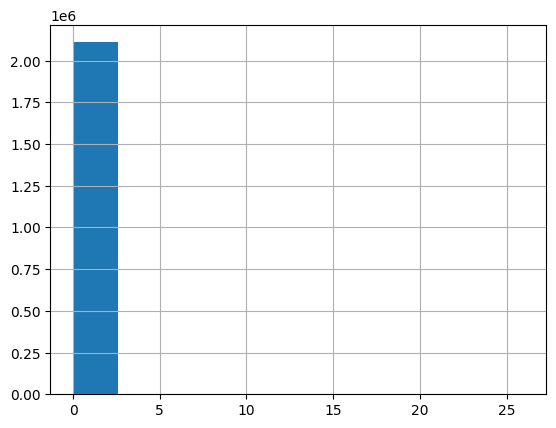

In [3]:
for col in ds.select_dtypes(include=['number']).columns:
    print("col: ", col)
    ds[col].hist()
    plt.show()

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3153360 entries, 0 to 3153359
Data columns (total 76 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   expiration_id                 int64  
 1   src_ip                        object 
 2   src_mac                       object 
 3   src_oui                       object 
 4   src_port                      int64  
 5   dst_ip                        object 
 6   dst_mac                       object 
 7   dst_oui                       object 
 8   dst_port                      int64  
 9   protocol                      int64  
 10  ip_version                    int64  
 11  vlan_id                       int64  
 12  bidirectional_first_seen_ms   int64  
 13  bidirectional_last_seen_ms    int64  
 14  bidirectional_duration_ms     int64  
 15  bidirectional_packets         int64  
 16  bidirectional_bytes           int64  
 17  src2dst_first_seen_ms         int64  
 18  src2dst_last_seen_ms  

Feature that need to be excluded because they are revealing or can cause bias: expiration_id, src_port, dst_port

Feature without variance, ip_version, vlan_id, bidirectional_urg_packets, src2dst_urg_packets, dst2src_urg_packets

In [5]:
ds.describe()

,expiration_id,src_port,dst_port,protocol,ip_version,vlan_id,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_duration_ms,bidirectional_packets,bidirectional_bytes,src2dst_first_seen_ms,src2dst_last_seen_ms,src2dst_duration_ms,src2dst_packets,src2dst_bytes,dst2src_first_seen_ms,dst2src_last_seen_ms,dst2src_duration_ms,dst2src_packets,dst2src_bytes,bidirectional_min_ps,bidirectional_mean_ps,bidirectional_stddev_ps,bidirectional_max_ps,src2dst_min_ps,src2dst_mean_ps,src2dst_stddev_ps,src2dst_max_ps,dst2src_min_ps,dst2src_mean_ps,dst2src_stddev_ps,dst2src_max_ps,bidirectional_min_piat_ms,bidirectional_mean_piat_ms,bidirectional_stddev_piat_ms,bidirectional_max_piat_ms,src2dst_min_piat_ms,src2dst_mean_piat_ms,src2dst_stddev_piat_ms,src2dst_max_piat_ms,dst2src_min_piat_ms,dst2src_mean_piat_ms,dst2src_stddev_piat_ms,dst2src_max_piat_ms,bidirectional_syn_packets,bidirectional_cwr_packets,bidirectional_ece_packets,bidirectional_urg_packets,bidirectional_ack_packets,bidirectional_psh_packets,bidirectional_rst_packets,bidirectional_fin_packets,src2dst_syn_packets,src2dst_cwr_packets,src2dst_ece_packets,src2dst_urg_packets,src2dst_ack_packets,src2dst_psh_packets,src2dst_rst_packets,src2dst_fin_packets,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets
count,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3153360.0,3153360.0,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3153360.0,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3153360.0,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06,3153360.0,3.153360e+06,3.153360e+06,3.153360e+06,3.153360e+06
mean,-5.009771e-01,4.159168e+04,7.374128e+03,9.568456e+00,4.0,0.0,1.499283e+12,1.499283e+12,7.257902e+03,1.683985e+01,1.590955e+04,1.499283e+12,1.499283e+12,7.030847e+03,8.444606e+00,5.132959e+03,1.055202e+12,1.055202e+12,6.414685e+03,8.395248e+00,1.077659e+04,7.041988e+01,2.508698e+02,3.004148e+02,9.158482e+02,8.071828e+01,1.101869e+02,5.055068e+01,2.165028e+02,7.445307e+01,3.269168e+02,3.169548e+02,8.509337e+02,4.681841e+01,4.395113e+02,8.065377e+02,2.364488e+03,2.444607e+02,7.574259e+02,7.969384e+02,2.257886e+03,3.192646e+02,7.252505e+02,5.386835e+02,1.769598e+03,5.954246e-01,2.695537e-04,4.059162e-04,0.0,1.575151e+01,2.007954e+00,1.751256e-01,3.428831e-01,3.424747e-01,2.635284e-04,2.200827e-04,0.0,7.736506e+00,9.631764e-01,7.217286e-02,2.068016e-01,2.529499e-01,6.025319e-06,1.858335e-04,0.0,8.015003e+00,1.044778e+00,1.029527e-01,1.360815e-01
std,5.329751e-01,2.193754e+04,1.742745e+04,5.149674e+00,0.0,0.0,1.237256e+08,1.237248e+08,2.441655e+04,1.654905e+03,2.238048e+06,1.237256e+08,1.237248e+08,2.427870e+04,8.468361e+02,1.538918e+06,6.845397e+11,6.845397e+11,2.370653e+04,8.248542e+02,1.565745e+06,2.760330e+01,3.937213e+02,6.920172e+02,1.946518e+03,1.374479e+02,1.815780e+02,1.669688e+02,4.847147e+02,7.436871e+01,6.199198e+02,8.348410e+02,1.927523e+03,8.930475e+02,1.643712e+03,2.654583e+03,8.108747e+03,2.892782e+03,3.332408e+03,2.709240e+03,8.083917e+03,3.555000e+03,4.027414e+03,2.420409e+03,7.732008e+03,9.187967e-01,2.283147e-02,2.800706e-02,0.0,1.654901e+03,2.290546e+01,3.800745e-01,4.746729e-01,5.450138e-01,2.257312e-02,1.500361e-02,0.0,8.468355e+02,1.431934e+01,2.587739e-01,4.050121e-01,4.438178e-01,2.926134e-03,1.370043e-02,0.0,8.248512e+02,1.649771e+01,3.038972e-01,3.428752e-01
min,-1.0

let's see how big the timeout was setted

In [6]:
ds['bidirectional_duration_ms'].max() / 1000

119.999

In [7]:
(sum(ds['bidirectional_rst_packets'] > 1) / ds.shape[0]) * 100

0.0

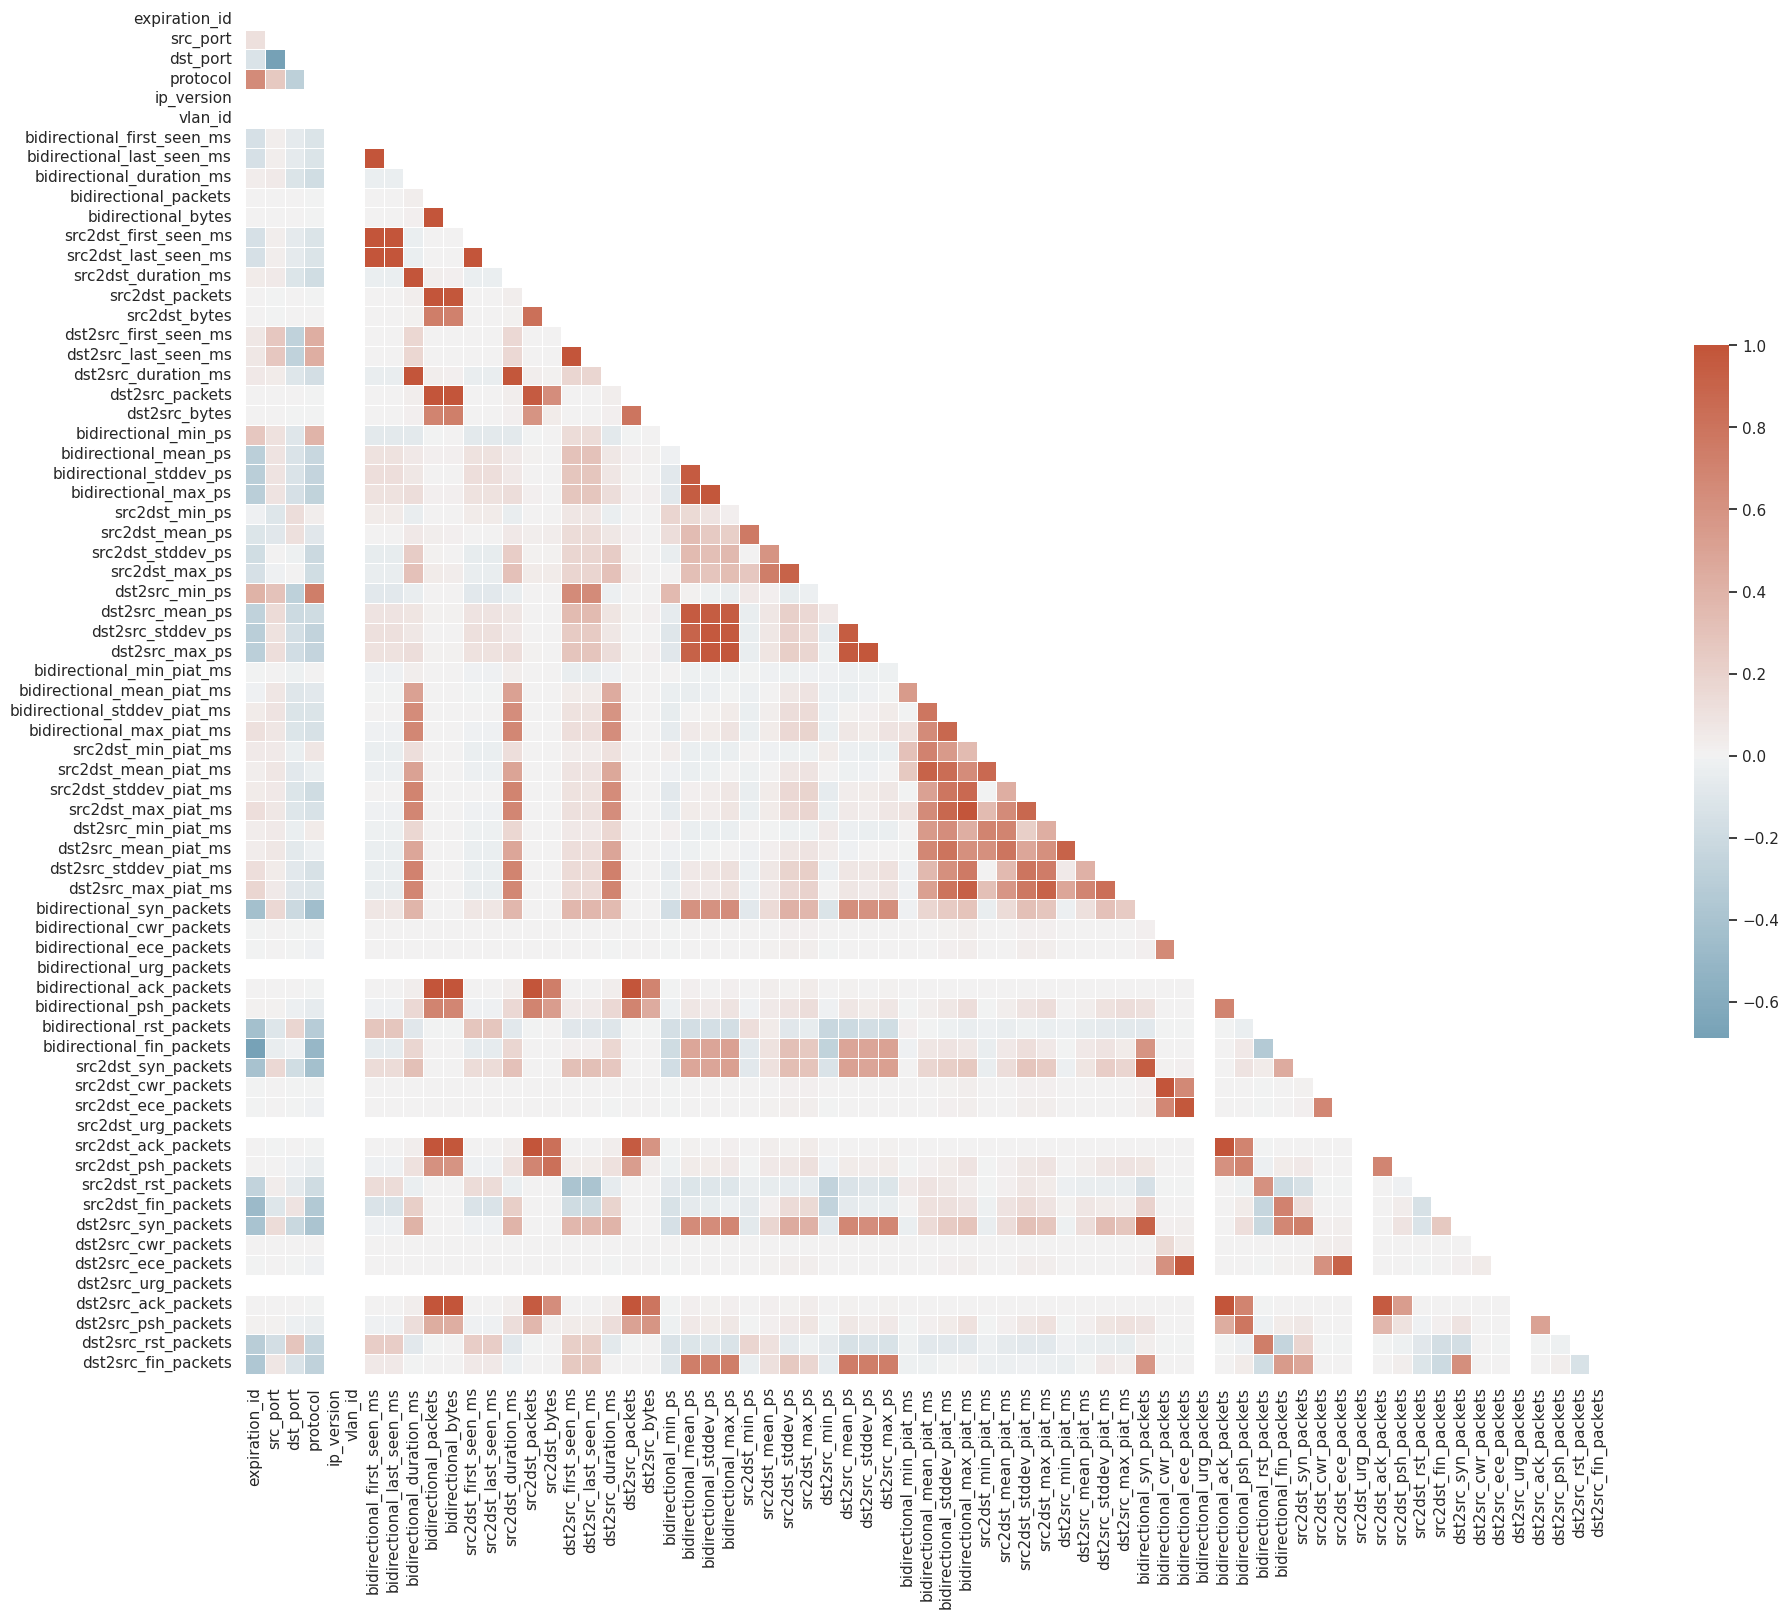

In [8]:
show_corr_matrix(ds)

In [9]:
(sum(ds.bidirectional_fin_packets > 2) / ds.shape[0]) * 100

0.0

In [10]:
(sum(ds.bidirectional_rst_packets > 2) / ds.shape[0]) * 100

0.0

In [11]:
correlation_matrix = ds.select_dtypes(include=['number','bool']).corr()

In [12]:
# Finding pairs with correlation greater than 0.9
correlation_threshold = 0.97
correlation_pairs = []

# Iterate through the upper triangle of the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            pair = (
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            )
            correlation_pairs.append(pair)

print(f"Pairs with correlation over {correlation_threshold * 100}%:")
for pair in correlation_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]}")

Pairs with correlation over 97.0%:
bidirectional_first_seen_ms - bidirectional_last_seen_ms: 0.9999999805472819
bidirectional_first_seen_ms - src2dst_first_seen_ms: 1.0
bidirectional_first_seen_ms - src2dst_last_seen_ms: 0.9999999807658511
bidirectional_last_seen_ms - src2dst_first_seen_ms: 0.9999999805472788
bidirectional_last_seen_ms - src2dst_last_seen_ms: 0.9999999999399063
bidirectional_duration_ms - src2dst_duration_ms: 0.9984590523069165
bidirectional_duration_ms - dst2src_duration_ms: 0.9875611640134813
bidirectional_packets - bidirectional_bytes: 0.9961288998055277
bidirectional_packets - src2dst_packets: 0.9902209161211535
bidirectional_packets - dst2src_packets: 0.9896900070803651
bidirectional_packets - bidirectional_ack_packets: 0.9999952533395579
bidirectional_packets - src2dst_ack_packets: 0.9902160101921584
bidirectional_packets - dst2src_ack_packets: 0.9896856358420598
bidirectional_bytes - src2dst_packets: 0.9832373558118622
bidirectional_bytes - dst2src_packets: 0.98

In [14]:
correlated_features = []
correlation_with_target = []
feature_name = []

for i in correlation_pairs:
    if i[0] not in correlated_features:
        correlated_features.append(i[0])
    if i[1] not in correlated_features:
        correlated_features.append(i[1])

for i in correlated_features:
    correlation_with_target.append(correlation_matrix['Label'][i])
    feature_name.append(i)

correlation_with_target = pd.DataFrame({'Feature': feature_name, 'Correlation': correlation_with_target})
print(correlation_with_target.shape)

KeyError: 'label'

In [ ]:
correlation_with_target["Correlation"] = correlation_with_target["Correlation"].abs()
correlation_with_target.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
12,bwd_header_size_max,0.149017
11,bwd_header_size_min,0.135375
16,flow_pkts_payload.max,0.131481
15,bwd_pkts_payload.max,0.131387
7,fwd_PSH_flag_count,0.073178
6,fwd_data_pkts_tot,0.072526
14,flow_pkts_payload.min,0.053423
13,fwd_pkts_payload.min,0.053417
4,bwd_header_size_tot,0.015100
1,bwd_pkts_tot,0.014471


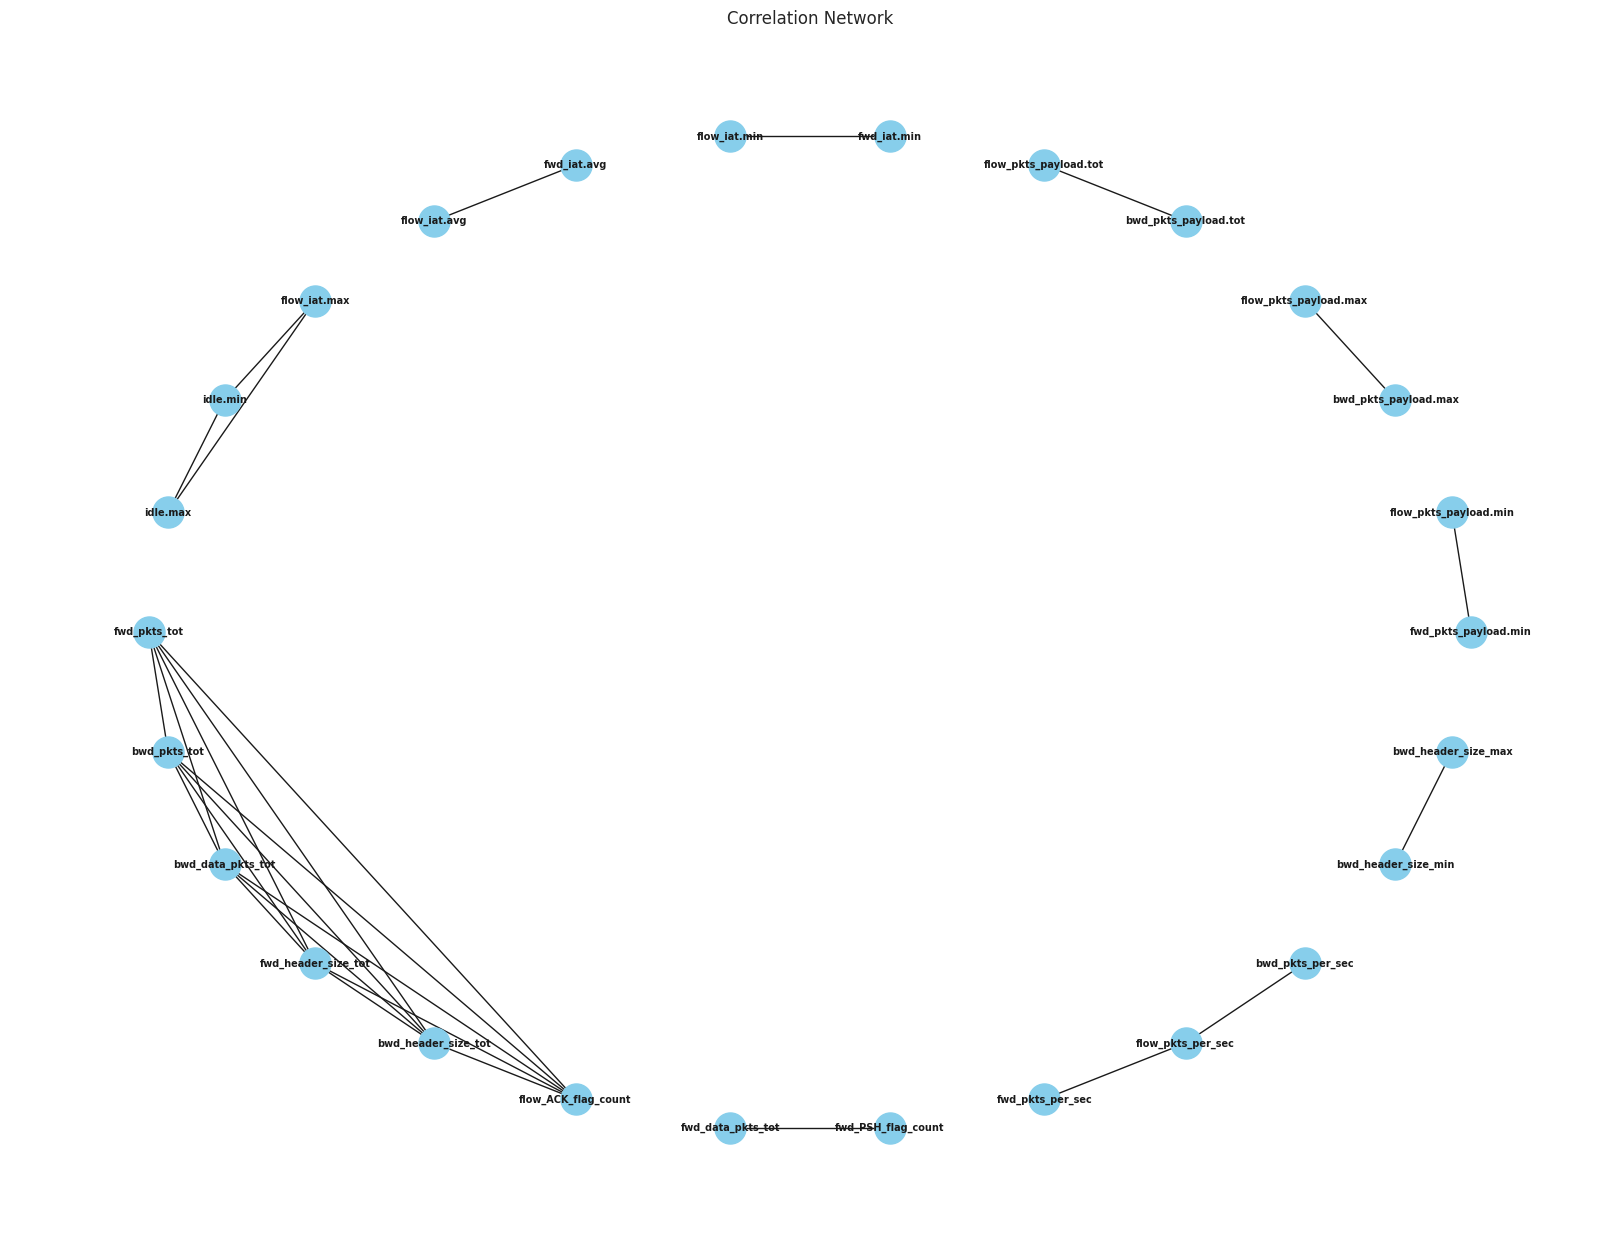

In [ ]:
# Create a graph
G = nx.Graph()

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            G.add_edge(correlation_matrix.columns[i], correlation_matrix.columns[j])

# Visualizing the graph
plt.figure(figsize=(16, 12))
pos = nx.shell_layout(G)  # Positions for all nodes

nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_weight='bold', font_size=7)
plt.title('Correlation Network')
plt.show()

In [ ]:
target_feature = 'Label'

feature_to_remove = []

# Finding connected components (clusters of correlated features)
connected_components = list(nx.connected_components(G))

# Analyzing each cluster
for cluster in connected_components:
    cluster = list(cluster)
    print(f"Cluster: {cluster}")
    max_corr = -1
    max_corr_feature = None
    
    for feature in cluster:
        if feature != target_feature:
            correlation_with_target = correlation_matrix.loc[feature, target_feature]
            if abs(correlation_with_target) > max_corr:
                max_corr = abs(correlation_with_target)
                max_corr_feature = feature
    
    print(f"Highest correlated feature with '{target_feature}': {max_corr_feature} (Correlation: {max_corr})")
    cluster.remove(max_corr_feature)
    feature_to_remove.extend(cluster)


Cluster: ['fwd_header_size_tot', 'bwd_header_size_tot', 'bwd_data_pkts_tot', 'flow_ACK_flag_count', 'bwd_pkts_tot', 'fwd_pkts_tot']
Highest correlated feature with 'Label': bwd_header_size_tot (Correlation: 0.015099913865850363)
Cluster: ['fwd_PSH_flag_count', 'fwd_data_pkts_tot']
Highest correlated feature with 'Label': fwd_PSH_flag_count (Correlation: 0.07317797680269945)
Cluster: ['bwd_pkts_per_sec', 'flow_pkts_per_sec', 'fwd_pkts_per_sec']
Highest correlated feature with 'Label': bwd_pkts_per_sec (Correlation: 0.004660033545999704)
Cluster: ['bwd_header_size_max', 'bwd_header_size_min']
Highest correlated feature with 'Label': bwd_header_size_max (Correlation: 0.14901723133291697)
Cluster: ['flow_pkts_payload.min', 'fwd_pkts_payload.min']
Highest correlated feature with 'Label': flow_pkts_payload.min (Correlation: 0.05342264750972606)
Cluster: ['bwd_pkts_payload.max', 'flow_pkts_payload.max']
Highest correlated feature with 'Label': flow_pkts_payload.max (Correlation: 0.13148095919

In [ ]:
feature_to_remove

['fwd_header_size_tot',
 'bwd_data_pkts_tot',
 'flow_ACK_flag_count',
 'bwd_pkts_tot',
 'fwd_pkts_tot',
 'fwd_data_pkts_tot',
 'flow_pkts_per_sec',
 'fwd_pkts_per_sec',
 'bwd_header_size_min',
 'fwd_pkts_payload.min',
 'bwd_pkts_payload.max',
 'bwd_pkts_payload.tot',
 'flow_iat.min',
 'flow_iat.avg',
 'flow_iat.max',
 'idle.min']

In [ ]:
len(feature_to_remove)

16

col:  expiration_id


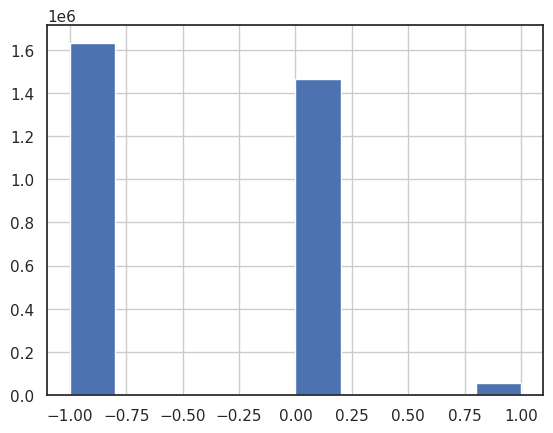

col:  src_ip


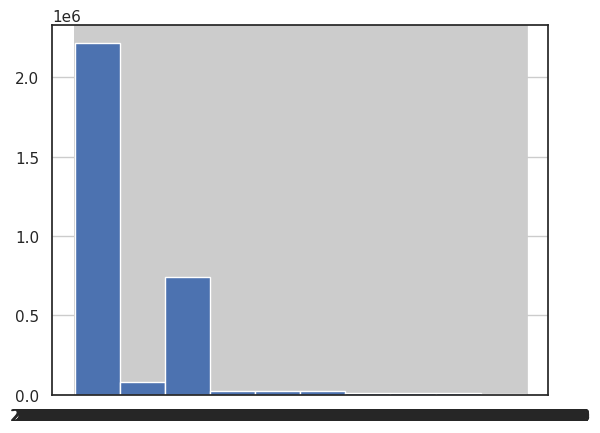

col:  src_mac


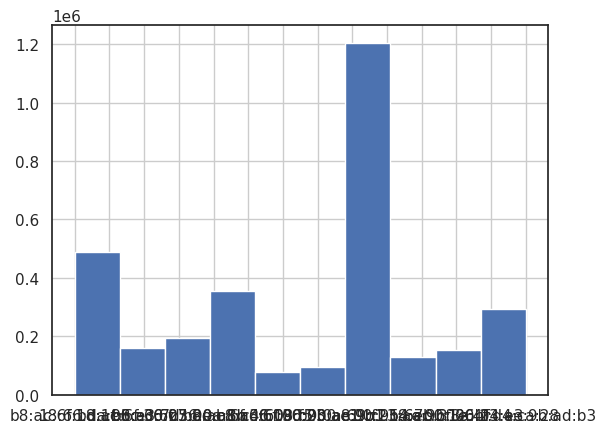

col:  src_oui


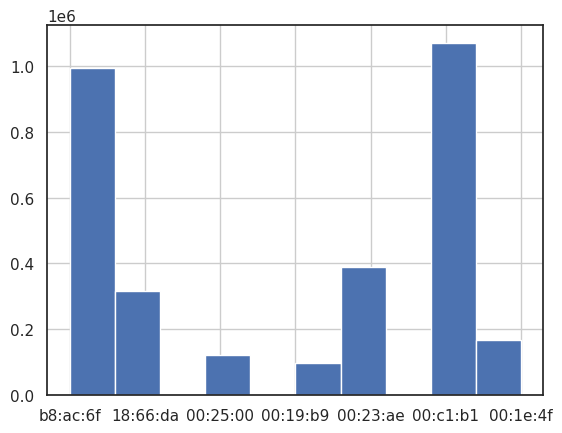

col:  src_port


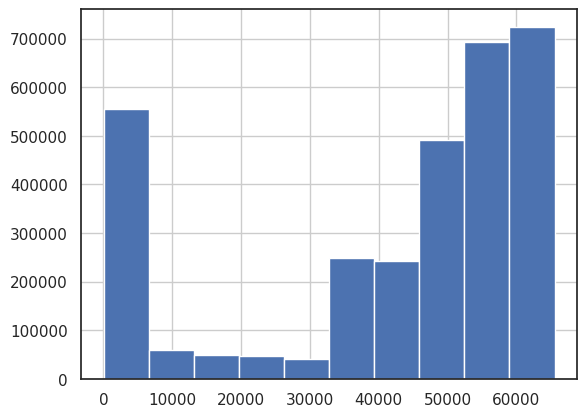

col:  dst_ip


KeyboardInterrupt: 

In [15]:
for col in ds.columns:
    print("col: ", col)
    ds[col].hist()
    plt.show()